Group : __3__ <br>
Anggota Kelompok (NIM) : <br>
- __Felicya Irenea Darmawi (23101910064)__
- __David Hansel Gunawan (23101910071)__
- __Jonathan C (23101910043)__<br>

Prodi Angkatan : __BM2019__ <br>
Mata Kuliah : __Regression Analysis and Forecasting Techniques__ <br>
Hal: __UAS__ <br>
Data : __Monthly Average Temperature in Auckland 2005 - 2019__ <br>

# Analisis Time Series and Forecasting Technique Terhadap Monthly Average Temperature in Auckland, 2005 - 2019

## <font color='blue'>Import Libraries & Classes</font>

In [1]:
# To tidy up data
import pandas as pd
import numpy as np
from datetime import datetime

# To create visualization
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

# To set theme
sns.set()

# To model the data
import scipy.stats
import pylab
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from sklearn.metrics import r2_score

# To check error
from sklearn.metrics import mean_squared_error

## <font color='blue'>Import Data</font>

In [2]:
DF = pd.read_csv(r'daily-temperature-1909-2019.csv',parse_dates=['date']) #The date column is converted into datetime data type
DF #DF is the raw data

,location_name,date,statistic,temperature,station_name_niwa,agent_number
0,Auckland,1966-01-01,Maximum,22.2,Auckland Aero,1962
1,Auckland,1966-01-01,Minimum,13.9,Auckland Aero,1962
2,Auckland,1966-01-01,Average,18.1,Auckland Aero,1962
3,Auckland,1966-01-02,Maximum,23.9,Auckland Aero,1962
4,Auckland,1966-01-02,Minimum,17.1,Auckland Aero,1962
...,...,...,...,...,...,...
2049466,Whangarei,2019-12-30,Minimum,12.7,Whangarei Aero Aws,1287
2049467,Whangarei,2019-12-30,Average,18.9,Whangarei Aero Aws,1287
2049468,Whangarei,2019-12-31,Maximum,24.1,Whangarei Aero Aws,1287
2049469,Whangarei,2019-12-31,Minimum,16.5,Whangarei Aero Aws,1287


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049471 entries, 0 to 2049470
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   location_name      object        
 1   date               datetime64[ns]
 2   statistic          object        
 3   temperature        float64       
 4   station_name_niwa  object        
 5   agent_number       int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 93.8+ MB


## <font color='blue'>Create Time Series Data</font>

In [4]:
df = DF[(DF['location_name']=='Auckland') & (DF['statistic']=="Average") & (DF['date']>=datetime(2005,1,1))].copy() #select average temperature daily data in Auckland, 2005 - 2019
ts = df.loc[:, ["date","temperature"]]
ts.index = ts.date #assign date as index to make time series data
ts= ts.resample('1M').mean() #transform daily data to monthly data
ts

,temperature
date,
2005-01-31,19.306452
2005-02-28,21.239286
2005-03-31,19.796774
2005-04-30,16.450000
2005-05-31,15.161290
...,...
2019-08-31,12.093548
2019-09-30,13.323333
2019-10-31,14.609677


## <font color='blue'>Data Preprocessing</font>

### Check Null and Duplicated Entries

In [5]:
ts.isnull().sum()

temperature    0
dtype: int64

In [6]:
ts.duplicated().sum()

0

======================================================================================================================= <br>
There is no null and duplicated entry.
======================================================================================================================= <br>

### Check and Fix Data Type for Each Column

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2005-01-31 to 2019-12-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


======================================================================================================================= <br>
The data type is appropriate.
======================================================================================================================= <br>

In [8]:
ts

,temperature
date,
2005-01-31,19.306452
2005-02-28,21.239286
2005-03-31,19.796774
2005-04-30,16.450000
2005-05-31,15.161290
...,...
2019-08-31,12.093548
2019-09-30,13.323333
2019-10-31,14.609677


### Plotting The Data

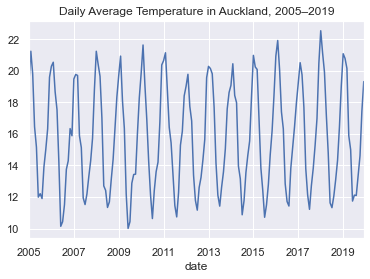

In [9]:
ts['temperature'].plot()
plt.title('Daily Average Temperature in Auckland, 2005–2019')
plt.savefig('plothehe1.png', dpi=900)
plt.show()

======================================================================================================================= <br>
In our hypothesis, an overview of the graph shows that: 
1. There is no trend in the data
2. Seasonality exist since the highest temperature happened on june - july and the lowest temperature happened on dec - jan
3. No cyclic behaviour present in the data
======================================================================================================================= <br>

### Train Test Split

In [10]:
size = int(len(ts)*0.8) #take 80% of the initial data as train data and 20% as test data
ts_train, ts_test = ts.iloc[:size], ts.iloc[size:]
ts_train

,temperature
date,
2005-01-31,19.306452
2005-02-28,21.239286
2005-03-31,19.796774
2005-04-30,16.450000
2005-05-31,15.161290
...,...
2016-08-31,11.425806
2016-09-30,13.823333
2016-10-31,15.132258


### Check Stationarity of The Train Dataset

$H_0$ = Data is not stationary

$H_1$ = Data is stationary

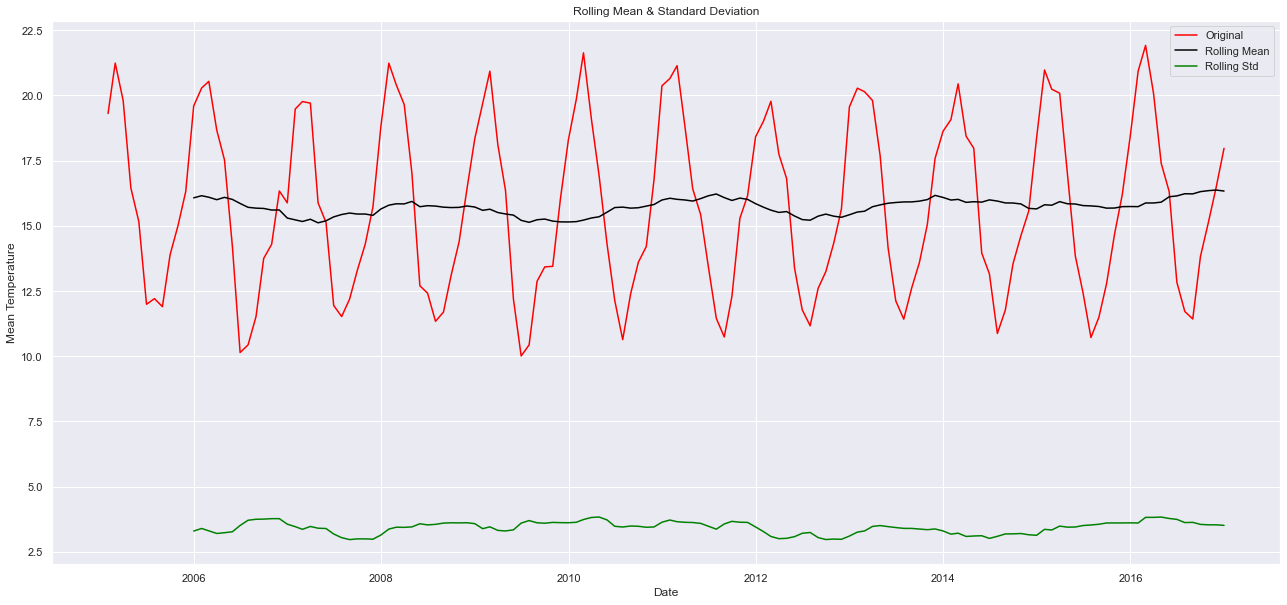

Test statistic:  -2.768903533019692
p-value:  0.06285479980046345
Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}


In [11]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = sts.adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts,n):
    #Rolling statistics
    rolmean = ts.rolling(n).mean()
    rolstd = ts.rolling(n).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_train,12)
check_adfuller(ts_train.temperature)


======================================================================================================================= <br>
Since p-value (0.0629) > 5%, then we do not reject $H_0$ <br>
Thus, the data is non-stationary.

And above graph shows when the data is smoothed using MA(12). Here we can see that the average mean and std is not constant yet.<br>
Thus, the graph also shows that the data is non-stationary.
======================================================================================================================= <br>

## Check Seasonality of The Data

<ipython-input-12-0c32c8341169>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(ts_train, model='additive',freq=12).plot()


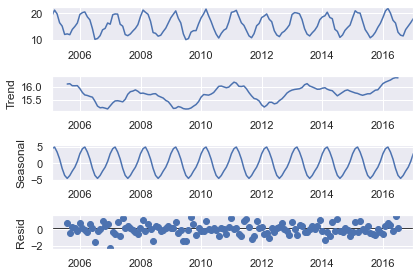

In [12]:
seasonal_decompose(ts_train, model='additive',freq=12).plot()
plt.show()

======================================================================================================================= <br>
There is seasonality but no constant trend exist.
======================================================================================================================= <br>

## <font color='blue'>Modelling The Time Series Train Dataset</font>

### The ACF

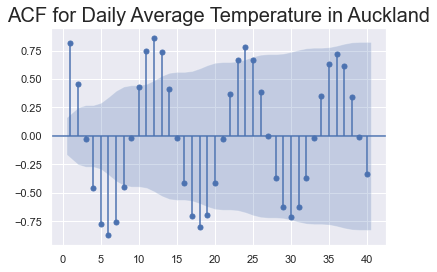

In [13]:
sgt.plot_acf(ts_train.temperature, zero = False, lags = 40)

# Plot title
plt.title("ACF for Daily Average Temperature in Auckland", size = 20)

# Show plot
plt.show()

### The PACF

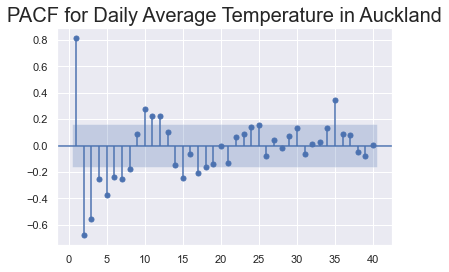

In [14]:
sgt.plot_pacf(ts_train.temperature[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
# Plot title
plt.title("PACF for Daily Average Temperature in Auckland", size = 20)

# Show plot
plt.show()

======================================================================================================================= <br>
1. The ACF trailed off to zero rather quickly and shows pattern. It means that the data shows no trend, but seasonality exist as ACF at lags 6, 12, 18, and 24 are significant but slowly decreasing.
2. The PACF spike at lag 1, 2, and 3 and the rest is not significant.

In conclusion, Since the ACF shows no trend and additive seasonal variability exist, we will try to use seasonal differencing (d = 0 and D = 1).</font>
======================================================================================================================= <br>

### Seasonal Differencing

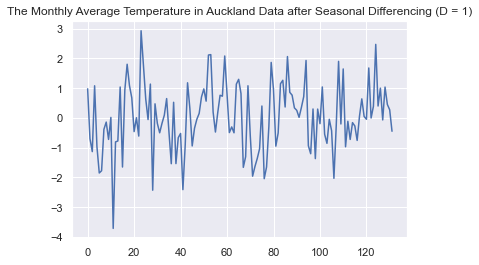

In [15]:
resample = ts_train.resample("M")
monthly_mean = resample.mean()
ts_train_sdiff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    ts_train_sdiff.append(value)
pyplot.title("The Monthly Average Temperature in Auckland Data after Seasonal Differencing (D = 1)")
pyplot.plot(ts_train_sdiff)
pyplot.show()

In [16]:
monthly_mean

,temperature
date,
2005-01-31,19.306452
2005-02-28,21.239286
2005-03-31,19.796774
2005-04-30,16.450000
2005-05-31,15.161290
...,...
2016-08-31,11.425806
2016-09-30,13.823333
2016-10-31,15.132258


In [17]:
pd.DataFrame(ts_train_sdiff).dropna(inplace=True) # due to shifting there is nan values
# check stationary:adfuller test
check_adfuller(ts_train_sdiff)

Test statistic:  -6.142946985817156
p-value:  7.890596422370722e-08
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}


======================================================================================================================= <br>
Since p-value (0.0004) < 5%, then we reject $H_0$ <br>
Thus, the data is stationary.
======================================================================================================================= <br>

### ACF and PACF for D = 1

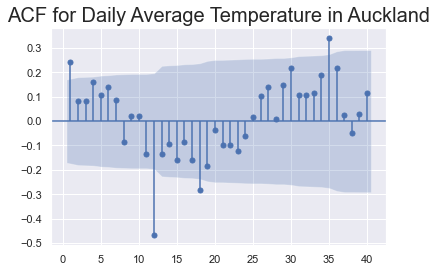

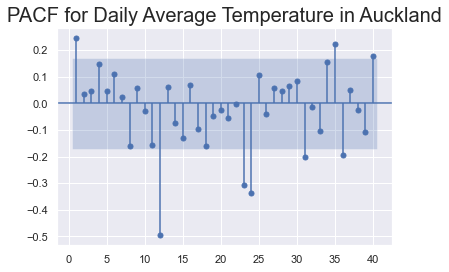

In [18]:
sgt.plot_acf(ts_train_sdiff, zero = False, lags = 40)
plt.title("ACF for Daily Average Temperature in Auckland", size = 20)

sgt.plot_pacf(ts_train_sdiff[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Daily Average Temperature in Auckland", size = 20)

plt.show()

======================================================================================================================= <br>
1. The ACF shows a spike at lag 1, 12, 18, and 35 but no other significant spikes. It indicating MA(1) and SMA(1)
2. The PACF shows a spike at lag 1, 12, 23, 24, 31, 35, and 36 but no other significant spikes. It indicating AR(1) and SAR (2) / SAR(3) 

Therefore, we will try:<br>
SARIMA(,10,0)(2,1,0)$_{12}$<br>
SARIMA(1,0,0)(3,1,0)$_{12}$<br>
SARIMA(0,0,1)(0,1,1)$_{12}$<br>
SARIMA(1,0,1)(2,1,1)$_{12}$<br>
SARIMA(1,0,1)(3,1,1)$_{12}$
======================================================================================================================= <br>

### The SARIMA Model

#### SARIMA(1,0,0)(2,1,0)$_{12}$

In [19]:
model_sarima1 = SARIMAX(ts_train.temperature, order=(1,0,0), seasonal_order = (2,1,0,12))
results_sarima1 = model_sarima1.fit()

#### SARIMA(1,0,0)(3,1,0)$_{12}$

In [20]:
model_sarima2 = SARIMAX(ts_train.temperature, order=(1,0,0), seasonal_order = (3,1,0,12))
results_sarima2 = model_sarima2.fit()

#### SARIMA(0,0,1)(0,1,1)$_{12}$

In [21]:
model_sarima3 = SARIMAX(ts_train.temperature, order=(0,0,1), seasonal_order = (0,1,1,12))
results_sarima3 = model_sarima3.fit()

#### SARIMA(1,0,1)(2,1,1)$_{12}$

In [22]:
model_sarima4 = SARIMAX(ts_train.temperature, order=(1,0,1), seasonal_order = (2,1,1,12))
results_sarima4 = model_sarima4.fit()

X:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### SARIMA(1,0,1)(3,1,1)$_{12}$

In [23]:
model_sarima5 = SARIMAX(ts_train.temperature, order=(1,0,1), seasonal_order = (3,1,1,12))
results_sarima5 = model_sarima5.fit()

### The Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)

In [24]:
MSE1=mean_squared_error(ts_test['temperature'],results_sarima1.forecast(len(ts_test)))
MSE2=mean_squared_error(ts_test['temperature'],results_sarima2.forecast(len(ts_test)))
MSE3=mean_squared_error(ts_test['temperature'],results_sarima3.forecast(len(ts_test)))
MSE4=mean_squared_error(ts_test['temperature'],results_sarima4.forecast(len(ts_test)))
MSE5=mean_squared_error(ts_test['temperature'],results_sarima5.forecast(len(ts_test)))

In [25]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [26]:
sarima1_MAPE= MAPE(ts_test['temperature'],results_sarima1.forecast(len(ts_test)))
sarima2_MAPE= MAPE(ts_test['temperature'],results_sarima2.forecast(len(ts_test)))
sarima3_MAPE= MAPE(ts_test['temperature'],results_sarima3.forecast(len(ts_test)))
sarima4_MAPE= MAPE(ts_test['temperature'],results_sarima4.forecast(len(ts_test)))
sarima5_MAPE= MAPE(ts_test['temperature'],results_sarima5.forecast(len(ts_test)))

In [27]:
#create a comparison dataframe among the SARIMA model
p = ['Log Likelihood', 'AIC', 'BIC', 'MSE', 'MAPE']
m1 = [results_sarima1.llf, results_sarima1.aic, results_sarima1.bic, MSE1, sarima1_MAPE]
m2 = [results_sarima2.llf, results_sarima2.aic, results_sarima2.bic, MSE2, sarima2_MAPE]
m3 = [results_sarima3.llf, results_sarima3.aic, results_sarima3.bic, MSE3, sarima3_MAPE]
m4 = [results_sarima4.llf, results_sarima4.aic, results_sarima4.bic, MSE4, sarima4_MAPE]
m5 = [results_sarima5.llf, results_sarima5.aic, results_sarima5.bic, MSE5, sarima5_MAPE]

columns = {' ': p, 
           'SARIMA(1,0,0)(2,1,0)$_{12}$': m1, 
           'SARIMA(1,0,0)(3,1,0)$_{12}$': m2,
           'SARIMA(0,0,1)(0,1,1)$_{12}$': m3,
           'SARIMA(1,0,1)(2,1,1)$_{12}$': m4,
           'SARIMA(1,0,1)(3,1,1)$_{12}$': m5}
compare = pd.DataFrame(columns).set_index(' ')
compare

,"SARIMA(1,0,0)(2,1,0)$_{12}$","SARIMA(1,0,0)(3,1,0)$_{12}$","SARIMA(0,0,1)(0,1,1)$_{12}$","SARIMA(1,0,1)(2,1,1)$_{12}$","SARIMA(1,0,1)(3,1,1)$_{12}$"
,,,,,
Log Likelihood,-169.372601,-169.106218,-166.005286,-164.732765,-168.126850
AIC,346.745202,348.212435,338.010573,341.465530,350.253701
BIC,358.276410,362.626445,346.658978,358.762342,370.433314
MSE,0.644930,0.624853,0.607302,0.612745,0.696922
MAPE,3.990221,3.890100,3.457460,3.478904,4.206086


======================================================================================================================= <br>
Based on the comparison table above, the best model to use is between SARIMA(0,0,1)(0,1,1)$_{12}$ and SARIMA(1,0,1)(2,1,1)$_{12}$ model since SARIMA(0,0,1)(0,1,1)$_{12}$ has the lowest value of AIC, BIC, MSE, and MAPE and SARIMA(1,0,1)(2,1,1)$_{12}$ has the largest value of Log Likelihood.<br>

We should choose the best model by checking the LLR test.<br>
======================================================================================================================= <br>

### LLR Test

In [28]:
def LLR_test(mod_1, mod_2, DF):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [29]:
LLR_test(results_sarima1, results_sarima2,1)

0.465

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(1,0,0)(2,1,0)$_{12}$ Model is a better model than the SARIMA(1,0,0)(3,1,0) $_{12}$ Model
======================================================================================================================= <br>

In [30]:
LLR_test(results_sarima3, results_sarima1,1)

1.0

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(0,0,1)(0,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,0)(2,1,0)$_{12}$ Model
======================================================================================================================= <br>

In [31]:
LLR_test(results_sarima3, results_sarima4,3)

0.467

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(0,0,1)(0,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,1)(2,1,1)$_{12}$ Model
======================================================================================================================= <br>


In [32]:
LLR_test(results_sarima3, results_sarima5,4)

1.0

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(0,0,1)(0,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,1)(3,1,1)$_{12}$ Model

In conclusion, the LLR test result state that SARIMA(0,0,1)(0,1,1)$_{12}$ is the best model to use. Let's check the summary of the result from the SARIMA(0,0,1)(0,1,1)$_{12}$ Model.
======================================================================================================================= <br>

### Model SARIMA(0, 0, 1)(0, 1, 1)$_{12}$ Summary 

In [33]:
results_sarima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -166.005
Date:                            Sun, 11 Jul 2021   AIC                            338.011
Time:                                    20:22:01   BIC                            346.659
Sample:                                01-31-2005   HQIC                           341.525
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1755      0.094      1.870      0.061      -0.008       0.359
ma.S.L12      -0.9988     16.127     -0.062      0.951     -32.608      30.610
sigma2         0.5784      9.308      0.062      0.950     -17.666      18.822
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.81   Prob(JB):                         0.23
Heteroskedasticity (H):               0.65   Skew:                            -0.13
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

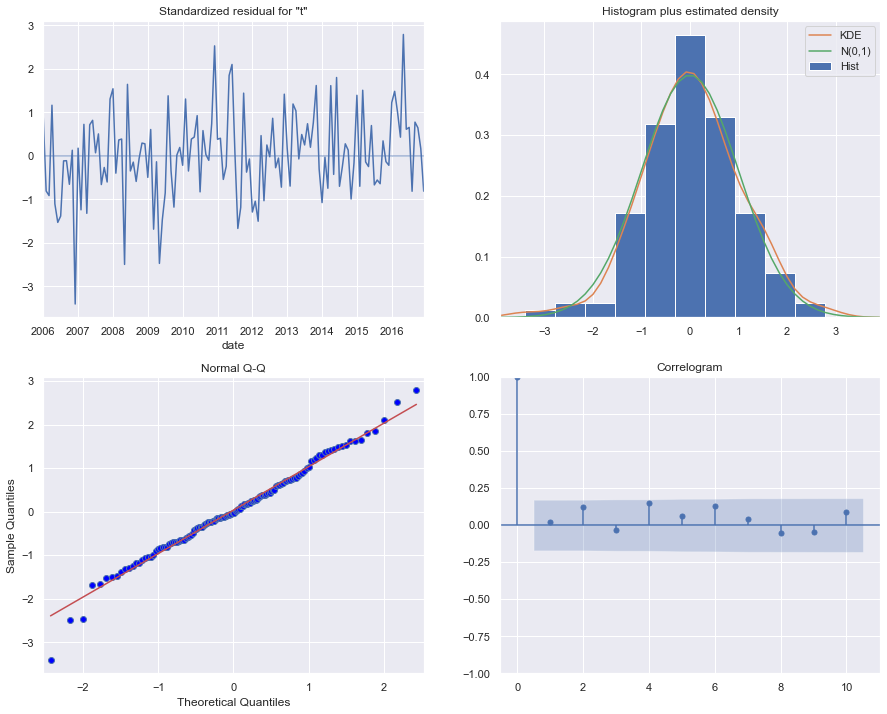

In [34]:
results_sarima3.plot_diagnostics(figsize=(15,12))
plt.savefig('plot14.png', dpi=900)
plt.show()

In [35]:
Resid_sarima3 = results_sarima3.resid[12:]
Resid_sarima3.mean()

0.012794973157937855

======================================================================================================================= <br>
The SMA(0, 0, 1)(0, 1, 1)$_{12}$ Model: <br>
__$Y_t = Y_{t-12} + e_t - 0.9980e_{t-12} + 0.1760e_{t-1} + -0.1756 e_{t-13} $__ <br>

$Y_t$ : *The average temperature at time t* <br>
$Y_{t-12}$ : *The average temperature at time t-12* <br>
$e_{t-12}$ : *The residual/error at lag 12* <br>
$e_{t-1}$ : *The residual/error at lag 1* <br>
$e_{t-13}$ : *The residual/error at lag 13* <br>

From the SARIMAX summary, the p-value of all coefficients is greater than 0.05 which means all variables present in the model is not significant. The Jarque-Bera (JB) p-value > 0.05 which means the residual is normal distribution.
The Heteroskedasticity (H) p-value > 0.05 which means the variance is constant. 

Supported from the normal Q-Q plot, we can see that we almost have a straight line, which suggest normality in error distribution. Also, the correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.<br>

Since there is no significant variable in SARIMA(0, 0, 1)(0, 1, 1)$_{12}$, then we should find the second best model from the fifth model above. Based on the AIC, BIC, Likelihood, MSE, and MAPE, the second best model is SARIMA(1,0,1)(2,1,1)$_{12}$. We will confirm this by checking the LLR test.<br>
======================================================================================================================= <br>

### Find The Second Best Model Using LLR Test

In [36]:
LLR_test(results_sarima1, results_sarima2,1)

0.465

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(1,0,0)(2,1,0)$_{12}$ Model is a better model than the SARIMA(1,0,0)(3,1,0) $_{12}$ Model
======================================================================================================================= <br>

In [37]:
LLR_test(results_sarima1, results_sarima4,2)

0.01

======================================================================================================================= <br>
Since The LLR Result is lower than 5%, The SARIMA(1,0,1)(2,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,0)(2,1,0) $_{12}$ Model
======================================================================================================================= <br>

In [38]:
LLR_test(results_sarima4, results_sarima5,1)

1.0

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(1,0,1)(2,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,1)(3,1,1) $_{12}$ Model.

Therefore, it supports our hypothesis that the The SARIMA(1,0,1)(2,1,1)$_{12}$ Model is the second best model after the SARIMA(0, 0, 1)(0, 1, 1)$_{12}$ model. 

Now, let's see the summary of the SARIMA(1,0,1)(2,1,1)$_{12}$ model.
======================================================================================================================= <br>

### Model SARIMA(1, 0, 1)(2, 1, 1)$_{12}$ Summary 

In [39]:
results_sarima4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -164.733
Date:                            Sun, 11 Jul 2021   AIC                            341.466
Time:                                    20:22:09   BIC                            358.762
Sample:                                01-31-2005   HQIC                           348.494
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7458      0.225      3.315      0.001       0.305       1.187
ma.L1         -0.5909      0.272     -2.169      0.030      -1.125      -0.057
ar.S.L12      -0.0594      0.151     -0.394      0.694      -0.355       0.236
ar.S.L24      -0.0300      0.138     -0.217      0.828      -0.300       0.240
ma.S.L12      -0.9969      9.101     -0.110      0.913     -18.835      16.842
sigma2         0.5603      5.048      0.111      0.912      -9.334      10.454
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.78   Prob(JB):                         0.33
Heteroskedasticity (H):               0.66   Skew:                            -0.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

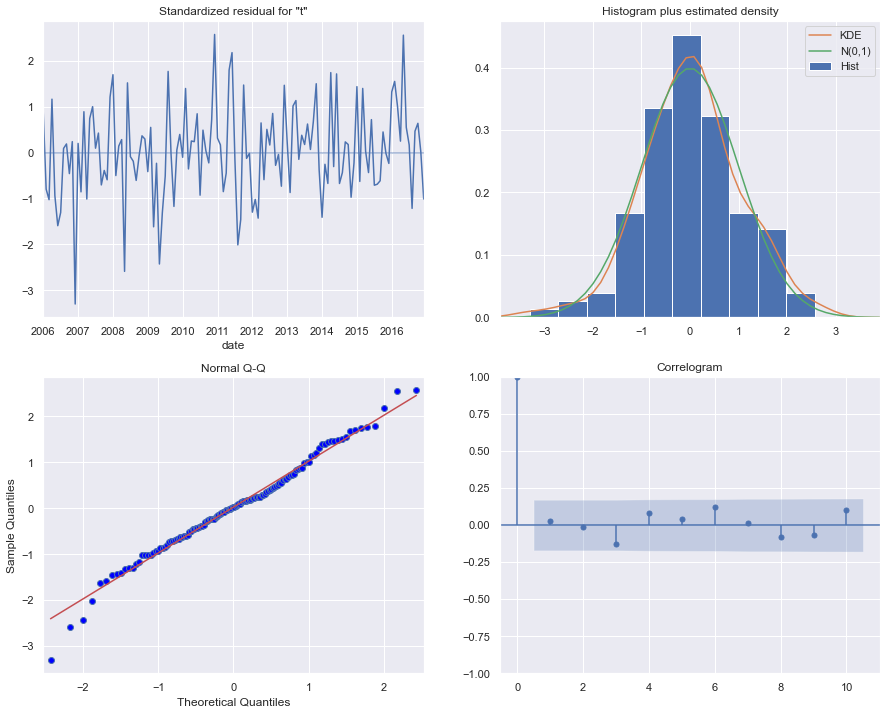

In [40]:
results_sarima4.plot_diagnostics(figsize=(15,12))
plt.savefig('plot13.png', dpi=900)
plt.show()

In [41]:
Resid_sarima4 = results_sarima4.resid[12:]
Resid_sarima4.mean()

0.007010843227558103

======================================================================================================================= <br>
The SARIMA(1, 0, 1)(2, 1, 1)$_{12}$ Model: <br>
__$Y_t = 0.9701Y_{t-12} - 0.0299Y_{t-24} + 0.7458Y_{t-1} - 0.7235Y_{t-13} + 0.0223Y_{t-25} + -0.9964e_{t-12} - 0.5910e_{t-1} +0.5889e_{t-13} + e_t$__ <br>

$Y_t$ : *The average temperature at time t* <br>
$Y_{t-12}$ : *The average temperature at time t-12* <br>
$Y_{t-12}$ : *The average temperature at time t-24* <br>
$Y_{t-1}$ : *The average temperature at time t-1* <br>
$Y_{t-13}$ : *The average temperature at time t-13* <br>
$Y_{t-25}$ : *The average temperature at time t-25* <br>
$e_{t-12}$ : *The residual/error at lag 12* <br>
$e_{t-1}$ : *The residual/error at lag 1* <br>
$e_{t-13}$ : *The residual/error at lag 13* <br>

From the SARIMAX summary, the p-value of AR (p) and MA (q) is lower than 0.05 which means they are significant and the rest is not significant. The Jarque-Bera (JB) p-value > 0.05 which means the residual is normal distribution. The Ljung Box (Q) prob > 0.05 which means there is no autocorrelation with the residuals. The Heteroskedasticity (H) p-value > 0.05 which means the variance is constant. 

Supported from the normal Q-Q plot, we can see that we almost have a straight line, which suggest normality in error distribution. Also, the correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.<br>
======================================================================================================================= <br>

======================================================================================================================= <br>
In conclusion, both model is a very good model to predict the monthly average temperature in Auckland. If the significance of the variables is the factor that we want to highlight, then choose the SARIMA(1, 0, 1)(2, 1, 1)$_{12}$ model. But, if the other goodness of fit (AIC, BIC), the error of prediction, and the simplest parameter are the factors that we want to highlight, then choose the SARIMA(0, 0, 1)(0, 1, 1)$_{12}$ model.

Therefore we will use both model to forecast the average temperature data in Auckland.
======================================================================================================================= <br>

## <font color='blue'>Predicting and Forecasting Test Data</font>

### The SMA(0, 0, 1)(0, 1, 1)$_{12}$ Model

In [42]:
ts_train['predicted_temperature3'] = results_sarima3.predict(start=ts_train.index[12])
ts_test['predicted_temperature3'] = results_sarima3.forecast(len(ts_test))
Forecast1 = results_sarima3.forecast(len(ts_test)+24)
Forecast1 = Forecast1[len(ts_test):]

<ipython-input-42-3e299ea72546>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_train['predicted_temperature3'] = results_sarima3.predict(start=ts_train.index[12])
<ipython-input-42-3e299ea72546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_test['predicted_temperature3'] = results_sarima3.forecast(len(ts_test))


### Plotting Train, Test, and Forecast Dataset

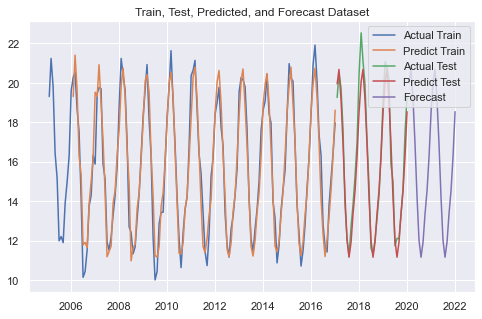

In [43]:
plt.figure(figsize=(8,5))
plt.plot(ts_train.temperature,label="Actual Train")
plt.plot(ts_train.predicted_temperature3,label="Predict Train")
plt.plot(ts_test.temperature,label="Actual Test")
plt.plot(ts_test.predicted_temperature3,label="Predict Test")
plt.plot(Forecast1,label="Forecast")
plt.title("Train, Test, Predicted, and Forecast Dataset")
plt.legend(loc = 'upper right')
plt.savefig('plot12.png', dpi=900)
plt.show()

In [44]:
print("The R\N{SUPERSCRIPT TWO} score for the test data set:",round(r2_score(ts_test['predicted_temperature3'], ts_test['temperature']),4))

The R² score for the test data set: 0.9406


### The SARIMA(1, 0, 1)(2, 1, 1)$_{12}$ Model

In [45]:
ts_train['predicted_temperature4'] = results_sarima4.predict(start=ts_train.index[12])
ts_test['predicted_temperature4'] = results_sarima4.forecast(len(ts_test))
Forecast2 = results_sarima4.forecast(len(ts_test)+24)
Forecast2 = Forecast2[len(ts_test):]

<ipython-input-45-8d2f038a975b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_train['predicted_temperature4'] = results_sarima4.predict(start=ts_train.index[12])
<ipython-input-45-8d2f038a975b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_test['predicted_temperature4'] = results_sarima4.forecast(len(ts_test))


### Plotting Train, Test, and Forecast Dataset

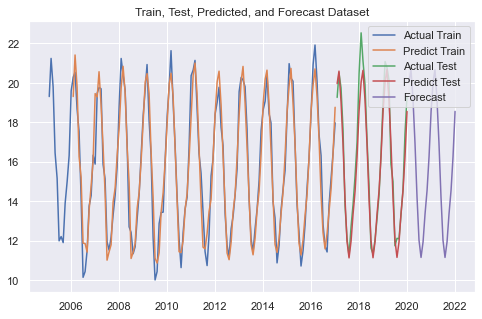

In [46]:
plt.figure(figsize=(8,5))
plt.plot(ts_train.temperature,label="Actual Train")
plt.plot(ts_train.predicted_temperature4,label="Predict Train")
plt.plot(ts_test.temperature,label="Actual Test")
plt.plot(ts_test.predicted_temperature4,label="Predict Test")
plt.plot(Forecast2,label="Forecast")
plt.title("Train, Test, Predicted, and Forecast Dataset")
plt.legend(loc = 'upper right')
plt.savefig('plot11.png', dpi=900)
plt.show()

In [47]:
print("The R\N{SUPERSCRIPT TWO} score for the test data set:",round(r2_score(ts_test['predicted_temperature4'], ts_test['temperature']),4))

The R² score for the test data set: 0.94


======================================================================================================================= <br>
### <font color='red'>Conclusion:</font>
We managed to build two good models, SMA(0, 0, 1)(0, 1, 1)$_{12}$ model and SMA(0, 0, 1)(0, 1, 1)$_{12}$ model, which can be seen from the SARIMAX summary above. Both model can be used since both $R^2$ score is 0.94 and the rest is depends on the factor of which we want to highlight for the best model to choose. 
======================================================================================================================= <br>